# KMean Clustering Test



**The required libraries are imported as below.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from tabulate import tabulate

In [2]:
#!pip install tabulate
#the styles that you can use :

#“plain”
#“simple”
#“github”
#“grid”
#“fancy_grid”
#“pipe”
#“orgtbl”
#“jira”
#“presto”
#“pretty”
#“psql”
#“rst”
#“mediawiki”
#“moinmoin”
#“youtrack”
#“html”
#“latex”
#“latex_raw”
#“latex_booktabs”
#“textile”

In [3]:
df = pd.read_csv('Wells_Core.csv')
#df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   194 non-null    float64
 1   CPERM   194 non-null    float64
 2   CPOR    194 non-null    float64
 3   WELL    194 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.2+ KB


In [4]:
df = df[df.CPERM != 0]
df.head()

,DEPTH,CPERM,CPOR,WELL
0,3545.0,0.7,0.04,wb1
1,3547.0,2.2,0.10,wb1
2,3548.0,1.1,0.10,wb1
3,3550.0,1.3,0.10,wb1
4,3552.0,1.0,0.07,wb1


In [5]:
def rock_quality_index(core_permeability, core_porosity):
    RQI = 0.0314*(np.sqrt(core_permeability/core_porosity))
    return RQI
df['RQI'] = rock_quality_index(df['CPERM'], df['CPOR'])

def pore_grain_volume(core_porosity):
    PHIz = core_porosity / (1 - core_porosity)
    return PHIz
df['PHIz'] = pore_grain_volume(df['CPOR'])

def flow_zone_indicator(rock_quality_index, pore_grain_volume):
    FZI = rock_quality_index / pore_grain_volume
    return FZI
df['FZI'] =flow_zone_indicator(df['RQI'], df['PHIz'] )

def log_FZI(flow_zone_indicator):
    LFZI = np.log10(flow_zone_indicator)
    return LFZI
df['LFZI'] = log_FZI(df['FZI'])

df.tail()

,DEPTH,CPERM,CPOR,WELL,RQI,PHIz,FZI,LFZI
189,3438.83,0.32,0.09,wb7,0.059208,0.098901,0.598663,-0.222818
190,3439.42,0.09,0.09,wb7,0.031400,0.098901,0.317489,-0.498271
191,3440.83,0.05,0.08,wb7,0.024824,0.086957,0.285475,-0.544433
192,3443.42,0.04,0.08,wb7,0.022203,0.086957,0.255336,-0.592888
193,3444.00,0.09,0.10,wb7,0.029789,0.111111,0.268098,-0.571707


In [6]:
df.sort_values('FZI', ascending=False)

,DEPTH,CPERM,CPOR,WELL,RQI,PHIz,FZI,LFZI
24,3045.00,321.81,0.13,we1,1.562276,0.149425,10.455231,1.019334
22,3038.00,130.01,0.11,we1,1.079498,0.123596,8.734117,0.941219
96,4965.00,62.76,0.09,wf1,0.829182,0.098901,8.383951,0.923449
47,4872.00,0.06,0.01,wf1,0.076914,0.010101,7.614484,0.881640
23,3043.00,161.57,0.13,we1,1.106976,0.149425,7.408226,0.869714
...,...,...,...,...,...,...,...,...
140,3388.42,0.02,0.09,wb7,0.014802,0.098901,0.149666,-0.824878
28,3619.00,0.10,0.15,we1,0.025638,0.176471,0.145282,-0.837788
159,3406.75,0.01,0.08,wb7,0.011102,0.086957,0.127668,-0.893918
178,3427.42,0.02,0.10,wb7,0.014043,0.111111,0.126383,-0.898313


In [50]:
def flow_zone_number(lfzi_max, lfzi_min):
    FZN = (lfzi_max - lfzi_min)/8
    return round(FZN, 8)

increment = flow_zone_number(df['LFZI'].max(), df['LFZI'].min())
unit8 = df['LFZI'].max()-increment
unit7 = unit8-increment
unit6 = unit7-increment
unit5 = unit6-increment
unit4 = unit5-increment
unit3 = unit4-increment
unit2 = unit3-increment
unit1 = unit2-increment

print(round(increment, 3), round(unit8,3), round(unit7,3), round(unit6,3), round(unit5,3), round(unit4,3), round(unit3,3), round(unit2,3), round(unit1,3))



0.24 0.78 0.54 0.3 0.061 -0.179 -0.419 -0.659 -0.898


In [94]:
def flow_zone_unit(value):
    
    increament = flow_zone_number(df['LFZI'].max(), df['LFZI'].min())
    unit8 = df['LFZI'].max() - increament
    unit7 = unit8 - increament
    unit6 = unit7 - increament
    unit5 = unit6 - increament
    unit4 = unit5 - increament
    unit3 = unit4 - increament
    unit2 = unit3 - increament
    unit1 = unit2 - increament
    
    if value['LFZI'] > unit8:
        return 'HFU8'
    elif value['LFZI'] <= unit8 and value['LFZI'] > unit7:
        return 'HFU7'
    elif value['LFZI'] <= unit7 and value['LFZI'] > unit6:
        return 'HFU6'
    elif value['LFZI'] <= unit6 and value['LFZI'] > unit5:
        return 'HFU5'
    elif value['LFZI'] <= unit5 and value['LFZI'] > unit4:
        return 'HFU4'
    elif value['LFZI'] <= unit4 and value['LFZI'] > unit3:
        return 'HFU3'
    elif value['LFZI'] <= unit3 and value['LFZI'] > unit2:
        return 'HFU2'
    else:
        return 'HFU1'

df['HFU'] = df.apply(lambda x : flow_zone_unit(x), axis=1)


In [95]:
print(tabulate(df.sort_values('LFZI', ascending=False), headers = 'keys', tablefmt = 'psql'))
#print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

+-----+---------+---------+--------+--------+-----------+-----------+-----------+-------------+-------+
|     |   DEPTH |   CPERM |   CPOR | WELL   |       RQI |      PHIz |       FZI |        LFZI | HFU   |
|-----+---------+---------+--------+--------+-----------+-----------+-----------+-------------+-------|
|  24 | 3045    |  321.81 |   0.13 | we1    | 1.56228   | 0.149425  | 10.4552   |  1.01933    | HFU8  |
|  22 | 3038    |  130.01 |   0.11 | we1    | 1.0795    | 0.123596  |  8.73412  |  0.941219   | HFU8  |
|  96 | 4965    |   62.76 |   0.09 | wf1    | 0.829182  | 0.0989011 |  8.38395  |  0.923449   | HFU8  |
|  47 | 4872    |    0.06 |   0.01 | wf1    | 0.076914  | 0.010101  |  7.61448  |  0.88164    | HFU8  |
|  23 | 3043    |  161.57 |   0.13 | we1    | 1.10698   | 0.149425  |  7.40823  |  0.869714   | HFU8  |
|  26 | 3051    |  102.65 |   0.12 | we1    | 0.918372  | 0.136364  |  6.73473  |  0.82832    | HFU8  |
| 156 | 3403.5  |  132.98 |   0.13 | wb7    | 1.00427   | 0.1494

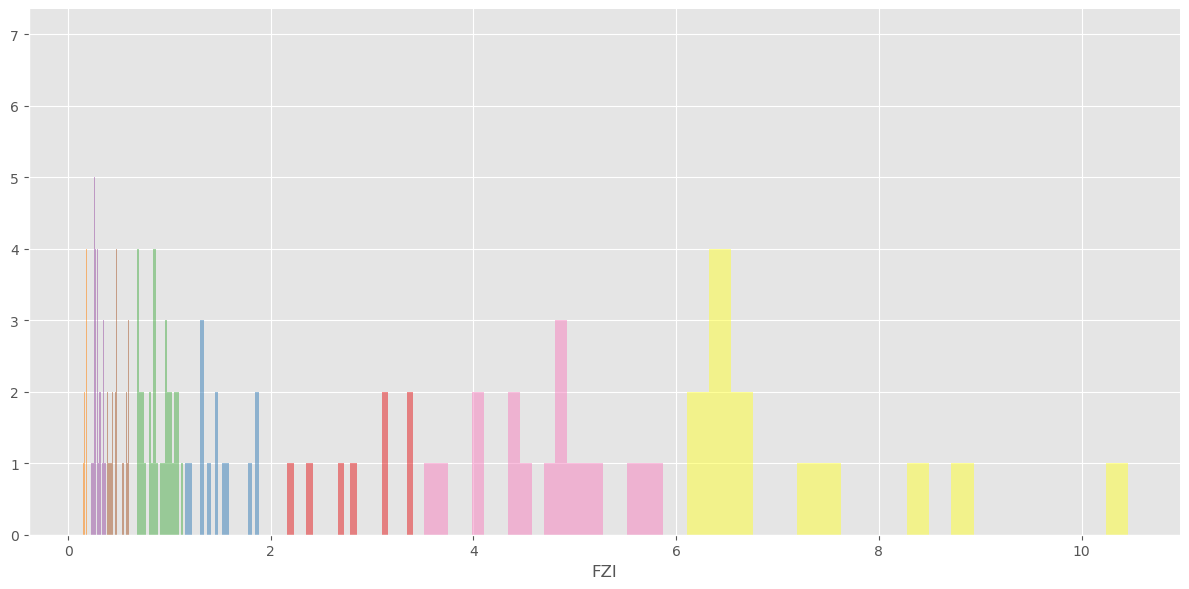

In [96]:
#sns.lmplot(x='PHIz', y='RQI', data=df, hue ='HFU', palette='Set1', height=5, aspect=2, fit_reg=False)
g = sns.FacetGrid(df, hue='HFU', palette='Set1',height=6, aspect=2)
g = g.map(plt.hist,'FZI', bins=20,alpha=0.5)

In [97]:
import plotly.express as px
#df = px.data.gapminder(df.HFU =='HFU1')
fig = px.scatter(df, x="PHIz", y="CPERM", 
                 trendline="ols", trendline_options=dict(log_y=True),
                 title="Log-transformed fit on linear axes")
fig.show()

In [55]:
#test = df.iloc[:,1:6] # 1t for rows and second for columns

#test = df[['CPOR', 'CPERM', 'FZI']]
#test

In [56]:
#param_space = {'RQI': np.logspace(-2, 0.19, 8)}
#param_space

## from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [21]:
#def optimise_k_means(test, max_k):
#    means = []
#    inertias = []
    
#    for k in range(1,max_k):
#        kmeans = KMeans(n_clusters=k)
#        kmeans.fit(test)
#        means.append(k)
#        inertias.append(kmeans.inertia_)
        
#    fig = plt.subplots(figsize=(10, 5))
#    plt.plot(means, inertias, 'o-')
#    plt.xlabel("Number of Clusters")
#    plt.ylabel("Inertia")
#    plt.grid(True)
#    plt.show()

In [22]:
#optimise_k_means(df, 30)

In [ ]:
#kmeans = KMeans(8)
#kmeans.fit(test)

In [23]:
#identified_clusters = kmeans.fit_predict(test)
#identified_clusters

In [24]:
#f, ax = plt.subplots(figsize=(10, 7))

#sns.scatterplot(x="CPOR", y="FZI", data=test, hue = identified_clusters, palette='Set1')
#ax.set(yscale="log")
#ax.grid(True)
#ax.axis([0.001, 0.25, 0.001, 1000])

#ax.set(xlabel="Core Porosity", ylabel="Core Permeability")

**How many entries we have in the dataset?**

In [ ]:
#df.info()

**Display the basic statistics, mean, std, max etc....**

In [ ]:
# Code here please so that you don't lose the output

In [ ]:
#df.dropna().describe()

## Exploratory Data Analysis

Let's do some EDA here, always good to know your data!

**How the area 'A' is related to the compactness 'C', create a scatter plot please. Luckily, we have the target values, pass it as hue argument!** Any comments on clusters!

In [ ]:
# Code here please so that you don't lose the output

[Text(0.5, 0, 'PHiZ'), Text(0, 0.5, 'RQI')]

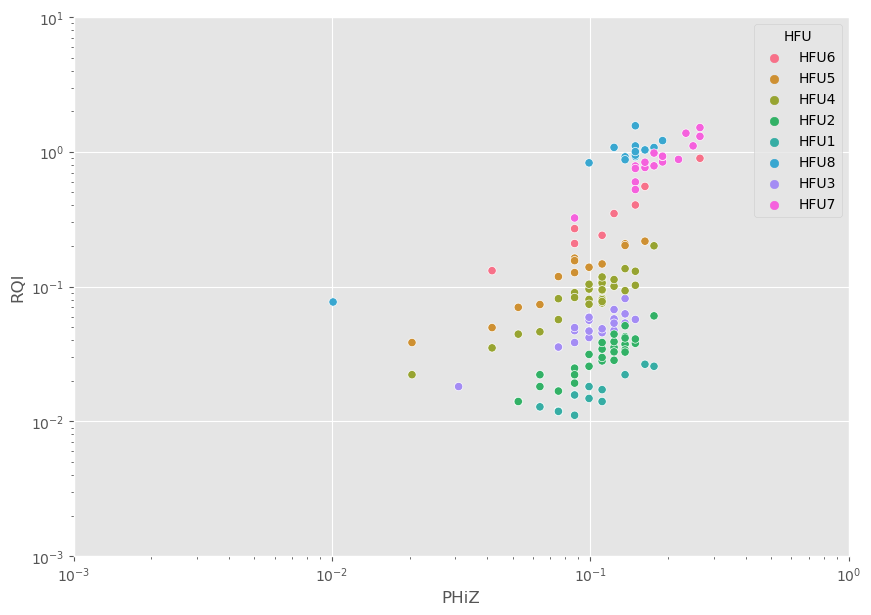

In [98]:
#from matplotlib.ticker import FuncFormatter
f, ax = plt.subplots(figsize=(10, 7))

sns.scatterplot(x="PHIz", y="RQI", hue='HFU', data=df)
ax.set(xscale="log", yscale="log")
ax.grid(True)
ax.axis([0.001, 1, 0.001, 10])
#ax.set_xticks([0.005,0.1,1])
#ax.set_yticks([0.005,5,10])
ax.set(xlabel="PHiZ", ylabel="RQI")



**To create the plot below (a stacked histogram) use [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html).**

In [ ]:
# Code here please so that you don't lose the output

In [38]:
#g = sns.FacetGrid(df, col="WELL", height=3.5, aspect=.65)
#g.map(sns.histplot, "RQI")

In [92]:
# Code here please so that you don't lose the output
df8 = df[df['HFU'] == 'HFU8']
df8.head(20)

,DEPTH,CPERM,CPOR,WELL,RQI,PHIz,FZI,LFZI,HFU
22,3038.0,130.01,0.11,we1,1.079498,0.123596,8.734117,0.941219,HFU8
23,3043.0,161.57,0.13,we1,1.106976,0.149425,7.408226,0.869714,HFU8
24,3045.0,321.81,0.13,we1,1.562276,0.149425,10.455231,1.019334,HFU8
25,3049.0,176.82,0.15,we1,1.078077,0.176471,6.109102,0.785977,HFU8
26,3051.0,102.65,0.12,we1,0.918372,0.136364,6.734726,0.828320,HFU8
39,4863.0,112.32,0.13,wf1,0.922968,0.149425,6.176784,0.790762,HFU8
40,4864.0,151.80,0.14,wf1,1.033955,0.162791,6.351436,0.802872,HFU8
41,4865.5,118.00,0.13,wf1,0.946017,0.149425,6.331037,0.801475,HFU8
47,4872.0,0.06,0.01,wf1,0.076914,0.010101,7.614484,0.881640,HFU8
95,4965.0,93.13,0.12,wf1,0.874750,0.136364,6.414831,0.807185,HFU8


[Text(0.5, 0, 'Core Porosity'), Text(0, 0.5, 'Core Permeability')]

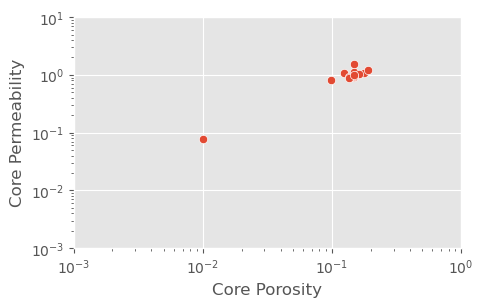

In [84]:
# Code here please so that you don't lose the output
f, ax = plt.subplots(figsize=(5, 3))

sns.scatterplot(x="PHIz", y="RQI", data=df8)
ax.set(xscale="log", yscale="log")
ax.grid(True)
ax.axis([0.001, 1, 0.001, 10])
#ax.set_xticks([0.005,0.1,1])
#ax.set_yticks([0.005,5,10])
ax.set(xlabel="Core Porosity", ylabel="Core Permeability")

In [85]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 22 to 156
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   13 non-null     float64
 1   CPERM   13 non-null     float64
 2   CPOR    13 non-null     float64
 3   WELL    13 non-null     object 
 4   RQI     13 non-null     float64
 5   PHIz    13 non-null     float64
 6   FZI     13 non-null     float64
 7   LFZI    13 non-null     float64
 8   HFU     13 non-null     object 
dtypes: float64(7), object(2)
memory usage: 1.0+ KB


In [88]:
from scipy.optimize import curve_fit

x = df8["PHIz"].values.reshape(-1, len(features))
y = np.log(df8["RQI"].values)

popt, pcov = curve_fit(lambda fx,a,b: a*fx**-b,  x, y)
power_y = popt[0]*df8.PHIz**-popt[1]

plt.scatter(x, y, label='actual data')
plt.plot(x, power_y, label='power-fit')
plt.legend()
plt.show()

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [89]:
#preprocessing
features = ['PHIz']
target = ['RQI']

X8 = df8[features].values.reshape(-1, len(features))
y8 = np.log(df8[target].values)
print(X8.shape, y8.shape)

(13, 1) (13, 1)


In [62]:
#Ordinary Least Squares
from sklearn import linear_model
ols8 = linear_model.LinearRegression()
model8 = ols8.fit(X8, y8)

In [63]:
#linear regression coefficient and the y-intercept 
print(model8.coef_, model8.intercept_)

[14.88991966] -2.2087695906309937


## The HFU 8 permeability  can be predicted from porosity, with the following linear model:
The result of the regression is: $10^{(14.88991966  * CPOR -2.2087695906309937)}$

In [64]:
#Accuracy assessment: R2
model8.score(X8, y8)

0.7992588804490549

In [65]:
#assume CPOR = 14% and 18%
x_pred8 = np.array([0.14, 0.18])
x_pred8 = x_pred8.reshape(-1, len(features))  # preprocessing required by scikit-learn functions
model8.predict(x_pred8)

array([-0.12418084,  0.47141595])

In [66]:
x_pred8 = np.linspace(0, 0.20, 200)            # 200 data points between 0 ~ 1
x_pred8 = x_pred8.reshape(-1, len(features))  # preprocessing required by scikit-learn functions
y_pred8 = model8.predict(x_pred8)

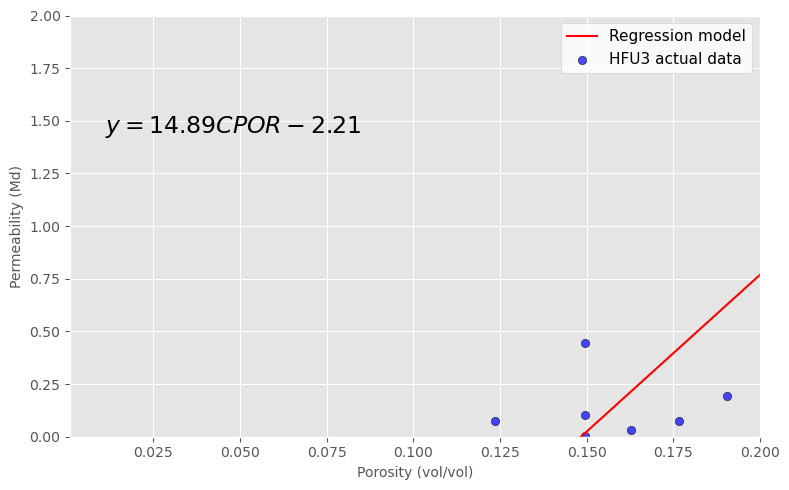

In [71]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_pred8, y_pred8, color='r', label='Regression model')
ax.scatter(X8, y8, edgecolor='k', facecolor='blue', alpha=0.7, label='HFU8 actual data')
ax.set_ylabel('Permeability (Md)', fontsize=10)
ax.set_xlabel('Porosity (vol/vol)', fontsize=10)
#ax.set(xscale="log", yscale="log")
ax.axis([0.001, 0.20, 0, 2])
ax.legend(facecolor='white', fontsize=11)
ax.text(0.05, 0.72, '$y = %.2f CPOR - %.2f $' % (model8.coef_[0], abs(model8.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()

In [ ]:
df3 = df[df['HFU'] == 'HFU2'].dropna()
df3.head(5)

In [ ]:
# Code here please so that you don't lose the output
f, ax = plt.subplots(figsize=(5, 3))

sns.scatterplot(x="CPOR", y="CPERM", data=df3)
ax.set(yscale="log")
ax.grid(True)
ax.axis([0.001, 0.15, 0.005, 50])
#ax.set_xticks([0.005,0.1,1])
#ax.set_yticks([0.005,5,10])
ax.set(xlabel="Core Porosity", ylabel="Core Permeability")

In [ ]:
#preprocessing
features = ['CPOR']
target = 'CPERM'

X = df3[features].values.reshape(-1, len(features))
y = np.log(df3[target].values)
print(X.shape, y.shape)

In [ ]:
#Ordinary Least Squares
from sklearn import linear_model
ols = linear_model.LinearRegression()
model = ols.fit(X, y)#linear regression coefficient and the y-intercept 
print(model.coef_, model.intercept_)

## The HFU 2 permeability  can be predicted from porosity, with the following linear model:
The result of the regression is: $10^{(44.87998396  * CPOR -4.690650768532301)}$

In [ ]:
#Accuracy assessment: R2
model.score(X, y)

In [ ]:
x_pred = np.linspace(0, 0.15, 200)            # 200 data points between 0 ~ 40
x_pred = x_pred.reshape(-1, len(features))  # preprocessing required by scikit-learn functions
y_pred = model.predict(x_pred)

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_pred, y_pred, color='r', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='blue', alpha=0.7, label='HFU2 actual data')
ax.set_ylabel('Permeability (Md)', fontsize=10)
ax.set_xlabel('Porosity (vol/vol)', fontsize=10)
#ax.set(yscale="log")
ax.axis([0.0, 0.16, -5.75, 5])
ax.legend(facecolor='white', fontsize=11)
ax.text(0.05, 0.72, '$y = %.2f CPOR - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()